### Function to call LLM

In [1]:
from openai import OpenAI
from dotenv import load_dotenv
import os

load_dotenv()
api_key = os.getenv("API_KEY")

client = OpenAI(api_key=api_key)

def call_gpt(prompt):
    messages = [
        {"role": "system", "content": 'You are a well-trained data scientist specifically good at machine learning.'},
        {"role": "user", "content": prompt}
    ]
    response = client.chat.completions.create(
        model="gpt-4",
        messages=messages,
        max_tokens=1000
    ).choices[0].message.content
    return response

### Code/ paper summaries

In [2]:
code_summaries = {
    'MO-GAAL': """
1. MO-GAAL (Multiple Objective Generative Adversarial Active Learning) is an outlier detection algorithm based on Generative Adversarial Networks (GANs). It uses multiple sub-generators, each with different objectives, to generate outliers, aiding in separating outliers from normal data. This also helps avoid mode collapse, where the generator produces limited sample variety. The model uses a discriminator to distinguish between real and generated outliers and a generator to produce potential outliers.

2. Advantages include its ability to discover complex outlier structures and improve detection performance, overcoming mode collapse. Disadvantages include the computational expense of training multiple GANs and the need for careful hyperparameter tuning. It may lack interpretability, as deep learning models often act as black boxes.

3. MO-GAAL performs well on high-dimensional data with complex patterns. However, it may be excessive for simpler datasets where more efficient methods could suffice, and it may not be suitable when interpretability is critical.
""",
    
    'SO-GAAL': """
1. SO-GAAL (Single-Objective Generative Adversarial Active Learning) is an outlier detection model using a GAN setup with one generator and one discriminator. The generator produces synthetic data, while the discriminator distinguishes between real and generated data. The model uses generated examples as potential outliers to learn boundaries between normal data and outliers.

2. Its advantages include dynamic learning and adaptability, especially when outliers are rare. However, the model may suffer from mode collapse, generating overly similar or 'good' examples, which could limit its effectiveness.

3. SO-GAAL works well on datasets with rare outliers or complex feature structures but may struggle when outliers cannot be well approximated by the generator or when there are only minor distinctions between normal and outlier data.
""",
    
    'AutoEncoder': """
1. This model is based on an AutoEncoder, a neural network used for unsupervised data representation learning. It compresses input data into a low-dimensional code via an encoder and reconstructs it through a decoder. Outliers are detected based on their reconstruction errors, as they typically deviate from normal instances. The model uses ReLU activation, dropout, and batch normalization to prevent overfitting.

2. AutoEncoders are unsupervised and adaptable, making them versatile across various datasets. However, they are sensitive to hyperparameter selection and may struggle to preserve global data structures.

3. AutoEncoders perform well on structured data like images or sequences but may struggle on noisy or scalar data with no inherent structure, where simpler methods could be more efficient.
""",
    
    'AnoGAN': """
1. AnoGAN uses GANs for outlier detection, with a generator and discriminator. It uses standard GAN training followed by training a separate query model to find the closest latent space point for each data instance. Outliers are detected based on their reconstruction error in the latent space.

2. AnoGAN is effective for modeling complex, high-dimensional data and handles both numerical and categorical data. However, it is computationally expensive, and GAN training is known to be unstable.

3. AnoGAN excels on complex datasets like images or medical scans but may struggle with simpler or imbalanced datasets, where traditional outlier detection methods might be more appropriate.
""",
    
    'Deep SVDD': """
1. Deep SVDD aims to minimize the volume of a hypersphere enclosing the network representations of data during training. It detects outliers by measuring the distance from the center. The architecture is customizable, allowing users to define the network layers and activation functions. It can also operate in autoencoder mode, where the encoder-decoder structure mirrors itself.

2. Advantages include unsupervised learning, flexibility in network architecture, and regularization options like dropout and L2. Disadvantages involve the need for trial-and-error hyperparameter tuning and the requirement of large datasets for effective training.

3. Deep SVDD performs well on datasets with identifiable patterns but struggles with noisy, imbalanced, or complex datasets where outliers are not easily separable from normal data.
""",
    
    'ALAD': """
1. ALAD uses a GAN architecture with an encoder, a generator, and three discriminators to distinguish real from generated data. The model can also incorporate reconstruction loss for improved performance.

2. ALAD excels at detecting complex patterns and works well on high-dimensional data. However, it requires substantial computational resources and may perform poorly when the data distribution is difficult to learn or when the dataset is small.

3. ALAD is effective for complex, high-dimensional datasets but may struggle with small or simple datasets, where traditional methods might be more efficient.
""",

    'AE1SVM' : """

1. This model combines an Autoencoder (AE) with a One-Class Support Vector Machine (SVM) to detect outliers. The Autoencoder learns a compressed representation of the data through encoding and decoding layers, while the One-Class SVM works on the encoded data's random Fourier features to separate normal data from outliers. The architecture uses hidden layers with customizable neurons, ReLU activations, batch normalization, and dropout for regularization. By utilizing random Fourier features in the SVM, it approximates a kernel function, allowing for non-linear decision boundaries to better distinguish outliers.

2. Advantages: The model can capture complex data patterns through the Autoencoder's deep structure and the SVM’s non-linear decision boundaries, providing enhanced outlier detection in non-linearly separable data. Batch normalization and dropout improve training stability and prevent overfitting. Disadvantages: It is computationally expensive, especially with a large number of random Fourier features. Training this model may be time-consuming due to the Autoencoder and SVM combination, which could also make it less effective on small datasets or real-time applications.

3. Good performance: This model is ideal for large datasets with high dimensionality and complex, non-linear patterns, where normal and anomalous data have distinguishable structures. Poor performance: It may perform poorly on small datasets, highly noisy datasets, or data with simple, linear separations between normal and anomalous points, as the model's complexity could lead to overfitting or unnecessary computation.
""",

    'DevNet' : """

1. DevNet's architecture varies in depth with options for shallow or deep networks, which include three specific models: DevNetD (3 hidden layers), DevNetS (1 hidden layer), and DevNetLinear (no hidden layer). These configurations allow flexible model complexity based on data needs. Each hidden layer uses ReLU activations, which helps capture non-linear patterns in the data. The model uses a specialized deviation loss, which applies Z-score deviation based on the assumption that inliers and outliers deviate from a reference distribution differently, optimizing the model to distinguish between them effectively.

2. Advantages: The flexibility of choosing the network depth makes it adaptable to various data complexities. The deviation loss function is tailored for outlier detection, providing direct optimization for distinguishing anomalies from normal instances. Disadvantages: Deep models, such as DevNetD, could overfit on small datasets with limited diversity, potentially reducing generalizability. The model may struggle with datasets containing subtle or high-dimensional anomalies that are hard to capture with simple linear layers. Training a deep network can be computationally expensive and requires considerable tuning, especially on larger datasets.

3. Good Performance: DevNet will likely perform well on datasets where the outliers exhibit distinct characteristics from the inliers, particularly if the data is moderately complex with features that can be captured by shallow or deep neural networks (e.g., low-dimensional structured data or data with clear, distinguishable outlier patterns). Poor Performance: The model might struggle on high-dimensional datasets where anomalies are subtle and require more sophisticated feature extraction than linear layers can provide. Additionally, if the outliers do not significantly deviate from the inliers, the deviation-based loss function may not effectively identify them.
""",

    'RGraph' : """

1. The RGraph model uses an elastic net subspace clustering technique with a graph-based transition matrix to represent data self-representation and outlier scoring. It combines elements of sparse representation (via the Lasso and linear regression) and an active support strategy to optimize computations, especially for large datasets. It detects outliers by constructing a transition matrix normalized by L1, followed by transition steps that propagate a probability vector through this matrix. Lower scores from this transition process signify outliers.

2. Advantages: It handles high-dimensional data well due to its reliance on sparse representations. The active support algorithm can optimize the process, making it scalable for large datasets. Disadvantages: The model may be computationally intensive, especially if the active support is not correctly tuned, as it iteratively solves optimization problems. Sensitivity to hyperparameters (like tau, gamma) can make the model difficult to tune, potentially impacting performance on noisy data.

3. Good performance: This model should perform well on high-dimensional, sparse datasets where data points reside in low-dimensional subspaces (e.g., image or signal data with natural clusters). Poor performance: It may struggle on dense, low-dimensional datasets with strong non-linear relationships, as its linear clustering technique might not capture complex patterns, potentially leading to poor outlier identification.
""",

    'LUNAR' : """

1. The LUNAR model uses graph neural networks to unify local outlier detection methods by leveraging nearest neighbors. Its architecture consists of two neural networks, SCORE_MODEL and WEIGHT_MODEL, each with three hidden layers of 256 units. The activation functions differ: SCORE_MODEL uses Tanh activations and a Sigmoid output, while WEIGHT_MODEL uses ReLU activations with a final layer normalizing weights via LayerNorm and BatchNorm. LUNAR generates anomaly scores by evaluating the distance between data points and their nearest neighbors and employs a unique negative sampling approach, using random uniform and subspace perturbations to simulate outliers.

2. Advantages: Flexibility: LUNAR's dual model approach allows for adaptability in scoring based on different types of outliers. Local Context Awareness: By focusing on k-nearest neighbors, it effectively captures local data structures, which can improve the detection of local outliers. Robust Sampling: The negative sampling technique enhances training by simulating diverse outlier types, potentially improving detection accuracy. Disadvantages: Computationally Intensive: The model’s reliance on neural networks and nearest neighbor searches could lead to high computational costs, particularly on large datasets. Hyperparameter Sensitivity: Its performance is likely sensitive to parameters like n_neighbors, sampling proportion, and model type, which may require fine-tuning for optimal results.

3. Good Performance: The model will likely excel on datasets with well-defined clusters or local structures where outliers are distinct from the majority class. Examples include structured datasets like social network data, sensor data, and geospatial data. Poor Performance: LUNAR may struggle on high-dimensional or noisy datasets where local neighborhood relationships are less meaningful or when the data is too sparse, making it difficult to discern local outliers effectively.
""",
    'VAE' : """

1. The Variational Autoencoder (VAE) has separate encoder and decoder architectures. The encoder reduces input features to a latent representation defined by mean (z_mu) and log variance (z_logvar). The decoder reconstructs the input from this latent representation. The loss is a combination of reconstruction loss (mean squared error) and KL divergence, weighted by a beta coefficient. This controls the tradeoff between reconstruction accuracy and latent space regularization.

2. Advantages: Captures complex patterns in the data due to its non-linear latent space. The KL divergence term ensures a structured latent space, potentially improving generalization. Flexible hyperparameters like beta and capacity allow tailored regularization. Disadvantages: Performance can degrade with poorly tuned hyperparameters, such as the beta coefficient. Requires sufficient data for training, making it computationally expensive. Sensitive to feature scaling and preprocessing

3. Good Performance: Datasets with continuous, high-dimensional data where outliers deviate significantly in structure or distribution, e.g., image or audio datasets. Data with moderate noise but strong underlying patterns that the VAE can learn. Bad Performance: Datasets with discrete or categorical data without preprocessing. Small datasets with insufficient examples to learn an effective latent representation. Datasets where outliers are very similar to inliers in terms of reconstruction, reducing the efficacy of the reconstruction error metric.
"""
}


#model信息2：paper summarize

paper_summaries = {
    "MO-GAAL": "MO-GAAL is an anomaly detection model designed to address the challenges in high-dimensional data by using multiple generators to create potential outliers that inform a discriminator about normal data boundaries. This approach mitigates the mode collapse issue found in single-generator models (like SO-GAAL) by using diverse objectives for each generator, enhancing robustness across different data types and structures. The model performs particularly well in detecting anomalies in datasets with complex cluster formations, high irrelevant variable ratios, and high-dimensionality scenarios. Suitable data sizes: medium, large. Data types: tabular data, images. Domains or fields: medical, technology, finance, manufacturing. Specific characteristics: high dimensionality, sparse data, imbalanced data, real-time data. Computational resources required: GPU, high memory. Training time and scalability: long training time, scalable to large datasets.",
    
    "AE1SVM": "AE-1SVM integrates autoencoders for dimensionality reduction with one-class SVM (OC-SVM) for anomaly detection. Using random Fourier features to approximate the RBF kernel, it enables the model to handle high-dimensional data efficiently. By combining these components into a unified, end-to-end architecture optimized with stochastic gradient descent, AE-1SVM addresses the computational limitations of traditional OC-SVM, providing scalability for large datasets. The model also supports interpretability through gradient-based attribution methods, allowing users to understand feature contributions to the anomaly detection decision. Suitable data sizes: large. Data types: tabular data, images. Domains or fields: medical, finance, technology, manufacturing. Specific characteristics: high dimensionality, sparse data, imbalanced data. Computational resources required: GPU, high memory. Training time and scalability: short training time, scalable to large datasets.",

    "DevNet": "DevNet is an anomaly detection model that directly optimizes anomaly scores by leveraging a small number of labeled anomalies alongside unlabeled data. Instead of indirect representation learning, DevNet uses a deviation loss function based on Z-scores, enforcing that anomalies receive significantly higher scores than normal data. This end-to-end approach results in interpretable anomaly scores and allows the model to handle diverse anomaly behaviors effectively. Experimental results show that DevNet significantly improves performance on both the AUC-ROC and AUC-PR metrics compared to other models. Suitable data sizes: medium, large. Data types: tabular data, text, images. Domains or fields: finance, cybersecurity, healthcare, technology. Specific characteristics: high dimensionality, sparse data, imbalanced data, noisy data. Computational resources required: GPU, high memory. Training time and scalability: short training time, scalable to large datasets.",

    "AnoGAN": "AnoGAN is a GAN-based model for unsupervised anomaly detection, specifically designed for medical imaging, such as retinal scans. By learning the manifold of normal anatomical variability, AnoGAN can identify anomalies that deviate from this learned distribution. Using a residual and discrimination loss, the model maps new images to the latent space, comparing them against normal anatomical patterns. This process enables pixel-level anomaly detection, allowing for both anomaly scoring and the identification of specific anomalous regions, such as retinal fluid or hyperreflective foci. The model has shown effectiveness in detecting known anomalies while also identifying potential unknown markers. Suitable data sizes: large. Data types: images. Domains or fields: medical (particularly ophthalmology). Specific characteristics: high dimensionality, noisy data. Computational resources required: GPU, high memory. Training time and scalability: long training time, scalable to large datasets.",

    "ALAD": "ALAD is a GAN-based anomaly detection model that leverages a bi-directional GAN, incorporating both a generator and an encoder, to improve efficiency in detecting anomalies. Unlike traditional GAN-based methods, ALAD includes a latent space encoder, allowing it to perform faster and more reliable anomaly scoring without extensive inference time. By adding cycle-consistency and spectral normalization, ALAD stabilizes GAN training and enhances anomaly detection, particularly in high-dimensional and complex datasets. The model uses a reconstruction-based anomaly score computed in feature space, enabling robust anomaly detection. Suitable data sizes: medium, large. Data types: tabular data, images. Domains or fields: cybersecurity, healthcare, finance, technology. Specific characteristics: high dimensionality, noisy data, sparse data, imbalanced data. Computational resources required: GPU, high memory. Training time and scalability: long training time, scalable to large datasets.",

    "Deep SVDD": "DeepSVDD is a deep learning model for unsupervised anomaly detection, designed to map data points into a hypersphere in a lower-dimensional space, minimizing the sphere’s volume around the normal data. By leveraging a neural network trained with a one-class objective, the model reduces the need for feature engineering common in traditional methods like OC-SVM. DeepSVDD optimizes the network to identify common factors in normal data while mapping anomalies outside the hypersphere, making it particularly effective for high-dimensional, structured datasets. It has been evaluated on image data, including MNIST and CIFAR-10, where it demonstrated competitive performance in one-class classification tasks. Suitable data sizes: medium, large. Data types: images. Domains or fields: cybersecurity, healthcare, technology, automotive. Specific characteristics: high dimensionality, noisy data. Computational resources required: GPU, high memory. Training time and scalability: long training time, scalable to large datasets.",

    "LUNAR": "LUNAR is a graph neural network (GNN)-based anomaly detection model that unifies and enhances local outlier detection methods like LOF, DBSCAN, and KNN by incorporating learnability into the detection process. By using a GNN architecture, LUNAR leverages a message-passing framework to dynamically aggregate information from the nearest neighbors of each node in a learnable way, improving anomaly detection flexibility and accuracy across different datasets. It particularly outperforms traditional local outlier methods and deep learning baselines in handling unstructured, feature-based data. LUNAR’s robustness to different neighborhood sizes allows it to adapt effectively across diverse datasets with limited tuning. Suitable data sizes: medium, large. Data types: tabular data, unstructured data. Domains or fields: finance, healthcare, technology, cybersecurity. Specific characteristics: sparse data, imbalanced data, high dimensionality. Computational resources required: GPU, high memory. Training time and scalability: short training time, scalable to large datasets.",

    "RGraph": "The R-Graph model uses a self-representation framework to detect outliers in data by constructing a representation graph. This graph leverages sparse and low-rank structures, where inliers form well-connected clusters within subspaces, and outliers fail to integrate into these clusters. By performing a random walk on this graph, the model distinguishes inliers as 'essential states' and outliers as 'inessential states,' allowing for robust detection, even in multi-subspace settings. The R-Graph approach performs effectively on image datasets, including face recognition and object images, especially where data is structured into clusters or subspaces. Suitable data sizes: medium, large. Data types: images. Domains or fields: computer vision, security, technology. Specific characteristics: high dimensionality, sparse data. Computational resources required: GPU, high memory. Training time and scalability: long training time, scalable to large datasets.",
    
    "VAE": "The VAE model uses a probabilistic approach for learning efficient representations through a variational autoencoding process. It introduces a reparameterization trick to optimize the variational lower bound via gradient descent, effectively approximating complex distributions using a generative model. VAEs are especially useful for data generation and dimensionality reduction tasks, handling intractable posterior distributions efficiently. The model demonstrates versatility in unsupervised learning tasks such as image denoising, inpainting, and data compression. Suitable data sizes: medium, large. Data types: images, tabular data. Domains or fields: healthcare, technology, education. Specific characteristics: high dimensionality, noisy data. Computational resources required: GPU, high memory. Training time and scalability: short training time, scalable to large datasets.",

    "SO-GAAL": "SO-GAAL is a GAN-based model designed for unsupervised outlier detection by treating outlier generation as a binary classification problem. It uses a single generator-discriminator pair, where the generator creates synthetic outliers to challenge the discriminator, which in turn learns to distinguish real data from these generated outliers. This approach helps in establishing a decision boundary around normal data by iteratively learning from the most informative potential outliers. SO-GAAL addresses the 'curse of dimensionality' and reduces reliance on predefined data assumptions, though it is susceptible to mode collapse, leading to limited performance in complex, clustered datasets. Suitable data sizes: small, medium. Data types: tabular data, images. Domains or fields: finance, manufacturing, healthcare, technology. Specific characteristics: sparse data, imbalanced data. Computational resources required: GPU, low memory. Training time and scalability: short training time, limited scalability to larger datasets.",

   "AutoEncoder": "Autoencoders are neural network models used for dimensionality reduction and anomaly detection by learning a compressed representation of the data. Typically structured as replicator neural networks, AEs have a symmetrical encoder-decoder architecture, where the input is compressed into a latent space by the encoder and then reconstructed by the decoder. The reconstruction error (difference between input and output) serves as an indicator of anomalies, as outliers tend to have higher reconstruction errors. AEs are particularly effective for reducing high-dimensional data, making them suitable alternatives to PCA and matrix factorization. Advanced variations like deep autoencoders can handle more complex, nonlinear distributions, often using pretraining to improve model stability and avoid overfitting. This model has applications in domains where high-dimensional data compression or outlier detection is crucial. Suitable data sizes: medium, large. Data types: images, tabular data. Domains or fields: healthcare, technology, finance, security. Specific characteristics: high dimensionality, noisy data, sparse data. Computational resources required: GPU, high memory. Training time and scalability: short to medium training time, scalable to large datasets."
}

In [3]:
def create_prompt(single_model_paper_summary, single_model_code_summary):
    prompt = f"""
You are an expert in machine learning models and datasets.

Given the following model summaries, analyze the model's strengths and weaknesses in terms of its suitability for different types of datasets. 

Your analysis should include these factors:
- Suitable data sizes: Choose from ["small", "medium", "large"].
- Data types: Choose from ["images", "text", "tabular data", "time series", "audio", "video"].
- Domains or fields: Choose from ["medical", "finance", "education", "social media", "retail", "manufacturing", "agriculture", "technology", "automotive", "others"].
- Suitable data type: Choose from ["noisy data", "high dimensionality", "sparse data", "imbalanced data", "real-time data", "low-signal data"].
- Computational resources required: Choose from ["CPU", "GPU", "high memory", "low memory"].
- Training time and scalability: Choose from ["short training time", "long training time", "scalable to large datasets", "not scalable"].

Please provide your analysis in JSON format with two keys: "strengths" and "weaknesses", each should contain a list of the keywords you chose ("label" field) + their corresponding "explanation".

Here is the model's paper summary:
{single_model_paper_summary}

Here is the model's code summary:
{single_model_code_summary}
"""

    return prompt


In [15]:
import json

output_folder = 'model_analysis_jsons'
os.makedirs(output_folder, exist_ok=True)

for model_name in code_summaries.keys():
    paper_summary = paper_summaries[model_name]
    code_summary = code_summaries[model_name]
    prompt = create_prompt(paper_summary, code_summary)
    
    assistant_reply = call_gpt(prompt)
    
    # Parse the reply as JSON
    try:
        analysis = json.loads(assistant_reply)
    except json.JSONDecodeError:
        print(f'JSON parsing failed for model {model_name}')
        continue
    
    # Save the JSON to a file
    output_file = os.path.join(output_folder, f'{model_name}.json')
    with open(output_file, 'w', encoding='utf-8') as f:
        json.dump(analysis, f, ensure_ascii=False, indent=4)
    
    print(f'Analysis for model {model_name} has been saved to {output_file}')

KeyboardInterrupt: 

In [5]:
def load_model_analyses(output_folder='model_analysis_jsons'):
    """
    Reads all JSON files in the specified folder and returns a dictionary
    where each key is the model name and the value is the content of the JSON file.

    Parameters:
    - output_folder (str): The folder where the JSON files are stored.

    Returns:
    - analyses (dict): Dictionary containing model analyses.
    """
    analyses = {}

    if not os.path.exists(output_folder):
        print(f"The folder '{output_folder}' does not exist.")
        return analyses
    json_files = [f for f in os.listdir(output_folder) if f.endswith('.json')]

    for json_file in json_files:
        model_name = os.path.splitext(json_file)[0]
        file_path = os.path.join(output_folder, json_file)

        # Read the JSON file
        with open(file_path, 'r', encoding='utf-8') as f:
            try:
                analysis = json.load(f)
                analyses[model_name] = analysis
            except json.JSONDecodeError:
                print(f'Failed to decode JSON for model {model_name}')
                continue

    return analyses

In [9]:
analyses = load_model_analyses_labels_only()
analyses

NameError: name 'load_model_analyses_labels_only' is not defined

In [10]:
import os
import json

def load_model_analyses_labels_only(output_folder='model_analysis_jsons'):
    """
    Reads all JSON files in the specified folder and returns a dictionary
    where each key is the model name and the value is a dictionary containing
    lists of labels for strengths and weaknesses.

    Parameters:
    - output_folder (str): The folder where the JSON files are stored.

    Returns:
    - analyses (dict): Dictionary containing model analyses with labels only.
    """
    analyses = {}
    if not os.path.exists(output_folder):
        print(f"The folder '{output_folder}' does not exist.")
        return analyses

    # List all JSON files in the folder
    json_files = [f for f in os.listdir(output_folder) if f.endswith('.json')]

    for json_file in json_files:
        model_name = os.path.splitext(json_file)[0]
        file_path = os.path.join(output_folder, json_file)

        # Read the JSON file
        with open(file_path, 'r', encoding='utf-8') as f:
            try:
                analysis = json.load(f)
                # Extract labels only
                strengths = analysis.get('strengths', [])
                weaknesses = analysis.get('weaknesses', [])

                # If strengths/weaknesses contain explanations, extract labels
                strengths_labels = []
                for item in strengths:
                    if isinstance(item, dict) and 'label' in item:
                        strengths_labels.append(item['label'])
                    else:
                        strengths_labels.append(item)

                weaknesses_labels = []
                for item in weaknesses:
                    if isinstance(item, dict) and 'label' in item:
                        weaknesses_labels.append(item['label'])
                    else:
                        weaknesses_labels.append(item)

                analyses[model_name] = {
                    'strengths': strengths_labels,
                    'weaknesses': weaknesses_labels
                }

            except json.JSONDecodeError:
                print(f'Failed to decode JSON for model {model_name}')
                continue

    return analyses


### Comparison

In [11]:
import pandas as pd
import json
import os

prn_df = pd.read_csv('prn_df.csv')
roc_df = pd.read_csv('roc_df.csv')
time_df = pd.read_csv('time_df.csv')

In [2]:
roc_df

,Unnamed: 0,Data,#Samples,# Dimensions,Outlier Perc,MO_GAAL,SO_GAAL,AutoEncoder,VAE,AnoGAN,DeepSVDD,ALAD,AE1SVM,DevNet,LUNAR
0,0,arrhythmia,452,274,14.6018,0.6160,0.5661,0.8116,0.8176,0.7946,0.7554,0.4232,0.8176,0.2110,0.8284
1,0,cardio,1831,21,9.6122,0.5603,0.7255,0.7847,0.9615,0.8004,0.9340,0.6025,0.9125,0.0503,0.5704
2,0,glass,214,9,4.2056,0.4247,0.3975,0.5901,0.6099,0.6765,0.4000,0.2667,0.6864,0.5580,0.7926
3,0,ionosphere,351,33,35.8974,0.6751,0.5908,0.7851,0.7675,0.6600,0.7535,0.5046,0.7730,0.6828,0.9156
4,0,letter,1600,32,6.2500,0.3489,0.3074,0.8087,0.5884,0.5223,0.5133,0.4811,0.5883,0.6991,0.9057
5,0,lympho,148,18,4.0541,0.5263,0.3918,0.9825,0.9825,0.9825,0.8421,0.6374,0.9649,0.0234,0.9357
6,0,mnist,7603,100,9.2069,0.6122,0.6926,0.8567,0.9002,0.6688,0.7207,0.4786,0.8721,0.4000,0.7411
7,0,musk,3062,166,3.1679,0.5686,0.4388,0.8853,1.0000,0.8060,0.9505,0.3772,1.0000,0.9987,0.7666
8,0,optdigits,5216,64,2.8758,0.6552,0.4641,0.5124,0.5074,0.8159,0.5199,0.4940,0.4455,0.7033,0.4836
9,0,pendigits,6870,16,2.2707,0.6974,0.5114,0.6687,0.9273,0.8492,0.7824,0.5690,0.9097,0.1047,0.6973


In [12]:
def load_experiment_results(results_dir='selection_results'):
    experiment_results = {}
    result_files = [f for f in os.listdir(results_dir) if f.endswith('.json')]
    
    for result_file in result_files:
        condition = os.path.splitext(result_file)[0]
        file_path = os.path.join(results_dir, result_file)
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        experiment_results[condition] = data
        print(f"Loaded results for condition '{condition}'")
    
    return experiment_results

experiment_results = load_experiment_results()

Loaded results for condition 'output'



Condition: output
Model recommendation counts:
  MO-GAAL: 0
  AutoEncoder: 18
  SO-GAAL: 0
  VAE: 0
  AnoGAN: 0
  Deep SVDD: 0
  ALAD: 0
  AE1SVM: 22
  DevNet: 4
  RGraph: 1
  LUNAR: 6


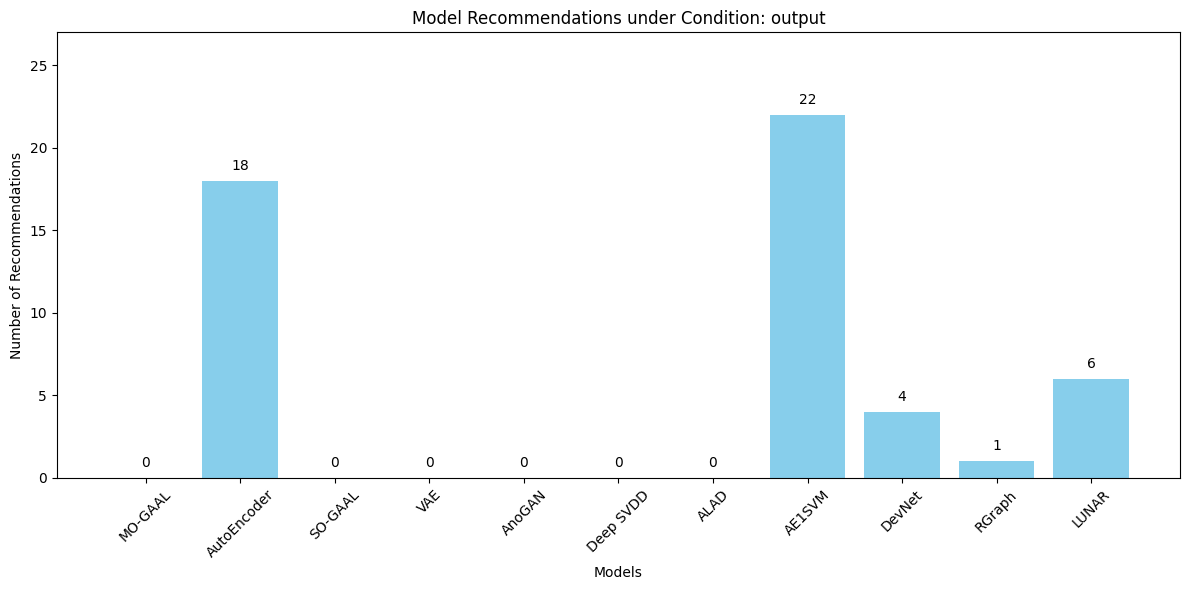

In [13]:
import re
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

model_list = ['MO-GAAL', 'AutoEncoder', 'SO-GAAL', 'VAE', 'AnoGAN', 'Deep SVDD', 'ALAD', 'AE1SVM', 'DevNet', 'RGraph', 'LUNAR']

for condition, results in experiment_results.items():
    print(f"\nCondition: {condition}")
    model_counter = Counter()
    for dataset_name, responses in results.items():
        for response in responses:
            answer = response['selected_model']
            cleaned_answer = re.sub(r'[^a-zA-Z\s]', '', answer)
            cleaned_answer_upper = cleaned_answer.upper()
            for model in model_list:
                model_cleaned = re.sub(r'[^a-zA-Z]', '', model).upper()
                if model_cleaned in cleaned_answer_upper.replace(' ', ''):
                    model_counter[model] += 1
    print("Model recommendation counts:")
    for model in model_list:
        count = model_counter.get(model, 0)
        print(f"  {model}: {count}")
    
    models = model_list
    counts = [model_counter.get(model, 0) for model in models]
    
    plt.figure(figsize=(12, 6))
    bars = plt.bar(models, counts, color='skyblue')
    plt.xlabel('Models')
    plt.ylabel('Number of Recommendations')
    plt.title(f'Model Recommendations under Condition: {condition}')
    plt.xticks(rotation=45)
    plt.ylim(0, max(counts) + 5)
    
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, 
                    str(count), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()



Overall Accuracy: 0.57

LLM's Selection Accuracy per Dataset:
arrhythmia: 0 out of 3 correct, Accuracy: 0.00
cardio: 0 out of 3 correct, Accuracy: 0.00
glass: 0 out of 3 correct, Accuracy: 0.00
ionosphere: 3 out of 3 correct, Accuracy: 1.00
letter: 3 out of 3 correct, Accuracy: 1.00
lympho: 2 out of 3 correct, Accuracy: 0.67
mnist: 3 out of 3 correct, Accuracy: 1.00
musk: 3 out of 3 correct, Accuracy: 1.00
optdigits: 0 out of 3 correct, Accuracy: 0.00
pendigits: 1 out of 3 correct, Accuracy: 0.33
pima: 3 out of 3 correct, Accuracy: 1.00
satellite: 3 out of 3 correct, Accuracy: 1.00
satimage-2: 3 out of 3 correct, Accuracy: 1.00
shuttle: 0 out of 3 correct, Accuracy: 0.00
vertebral: 0 out of 3 correct, Accuracy: 0.00
vowels: 3 out of 3 correct, Accuracy: 1.00
wbc: 2 out of 3 correct, Accuracy: 0.67


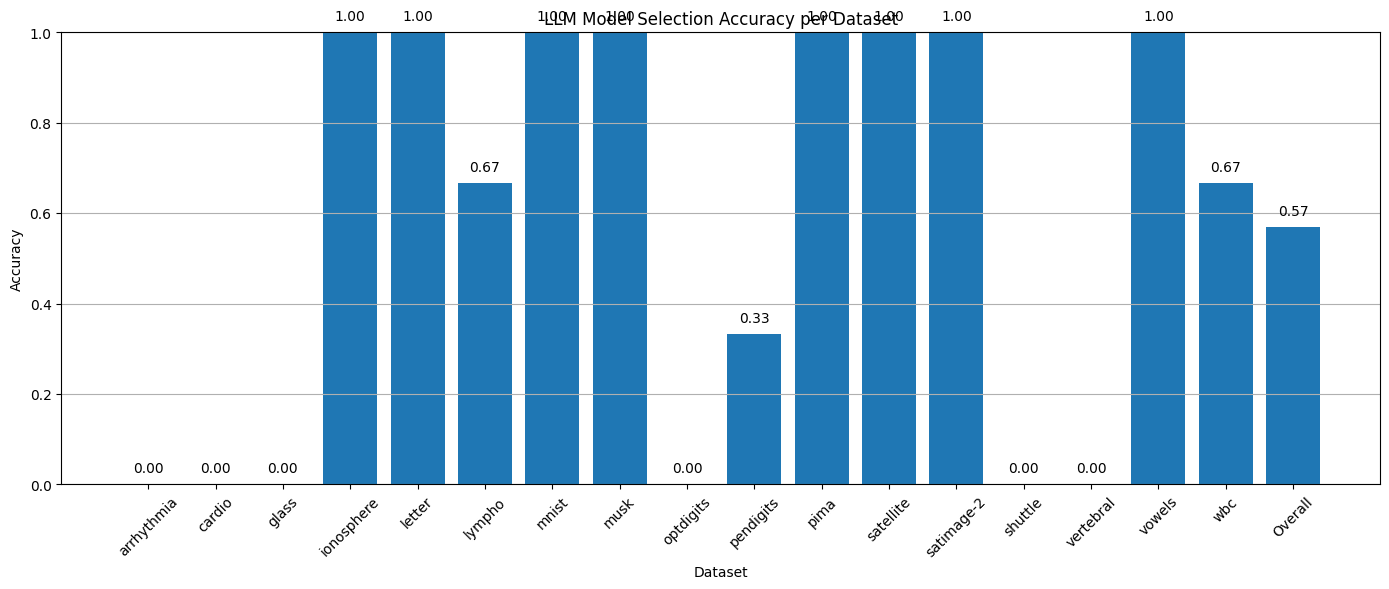

In [14]:
# Extract the list of model columns
model_columns = roc_df.columns[4:]  
top5_models_per_dataset = {}

for index, row in roc_df.iterrows():
    dataset = row['Data']
    # Get the ROC values for the models
    model_scores = row[model_columns]
    # Sort the models based on ROC values in descending order
    top5_models = model_scores.sort_values(ascending=False).head(3).index.tolist()
    top5_models_per_dataset[dataset] = top5_models


llm_selected_models = experiment_results['output']

# Extract the selected models for each dataset
selected_models_per_dataset = {}

for dataset, selections in llm_selected_models.items():
    selected_models = [entry['selected_model'] for entry in selections]
    selected_models_per_dataset[dataset] = selected_models

# Evaluate accuracy
correct_counts = {}
total_correct = 0
total_selections = 0

for dataset, selected_models in selected_models_per_dataset.items():
    top5 = top5_models_per_dataset.get(dataset, [])
    correct = sum([1 for model in selected_models if model in top5])
    total = len(selected_models)
    accuracy = correct / total if total > 0 else 0
    correct_counts[dataset] = {'correct': correct, 'total': total, 'accuracy': accuracy}
    # Accumulate total correct and total selections
    total_correct += correct
    total_selections += total

# Calculate overall accuracy
overall_accuracy = total_correct / total_selections if total_selections > 0 else 0
print(f"\nOverall Accuracy: {overall_accuracy:.2f}")

# Display the evaluation results per dataset
print("\nLLM's Selection Accuracy per Dataset:")
for dataset, counts in correct_counts.items():
    print(f"{dataset}: {counts['correct']} out of {counts['total']} correct, Accuracy: {counts['accuracy']:.2f}")

# Step 4: Visualize the Results

# Convert the results into a DataFrame
accuracy_df = pd.DataFrame.from_dict(correct_counts, orient='index')

# Reset index to turn the dataset names into a column
accuracy_df.reset_index(inplace=True)
accuracy_df.rename(columns={'index': 'Dataset'}, inplace=True)

# Add overall accuracy to the DataFrame using pd.concat
overall_row = pd.DataFrame({
    'Dataset': ['Overall'],
    'correct': [total_correct],
    'total': [total_selections],
    'accuracy': [overall_accuracy]
})

# Concatenate the overall accuracy row to the accuracy DataFrame
accuracy_df = pd.concat([accuracy_df, overall_row], ignore_index=True)

# Plot the accuracy per dataset
plt.figure(figsize=(14, 6))
bars = plt.bar(accuracy_df['Dataset'], accuracy_df['accuracy'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('LLM Model Selection Accuracy per Dataset')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')

# Add accuracy labels on top of each bar
for bar, acc in zip(bars, accuracy_df['accuracy']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f'{acc:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()